<a href="https://colab.research.google.com/github/MuhammadIqbal233/Minggu2_PCVK/blob/main/Minggu5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

Mounted at /content/drive


In [2]:
gambar = cv.imread('/content/drive/MyDrive/PCVK/female.png')

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma (misalnya 1.5): 0.2


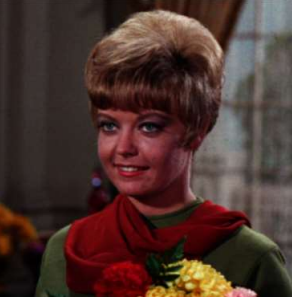

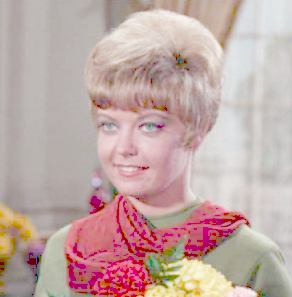

In [8]:
# Load gambar dari path yang sesuai
gambar = cv.imread('/content/drive/MyDrive/PCVK/female.png')

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma (misalnya 1.5): '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # Set gamma ke nilai default jika ada kesalahan input

# Melakukan gamma correction
gamma_corrected = np.array(255 * (gambar / 255) ** gamma, dtype = 'uint8')

# Menampilkan gambar asli dan hasil gamma correction
cv2_imshow(gambar)
cv2_imshow(gamma_corrected)

cv.waitKey(0)
cv.destroyAllWindows()

 Bit Depth pada Citra
---------------------------------


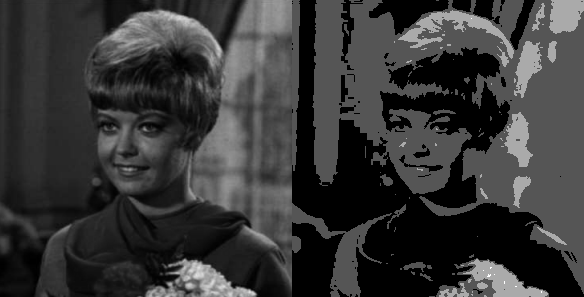

In [9]:
print(' Bit Depth pada Citra')
print('---------------------------------')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/PCVK/female.png', cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

Masukkan nilai 5,30,60,80,100: 80


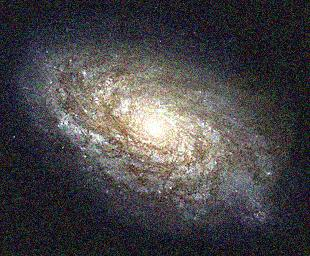

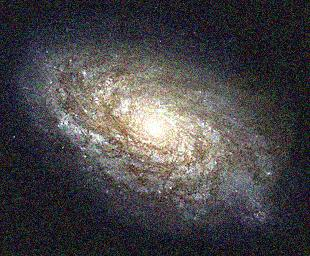

PSNR antara gambar asli dan hasil average denoising: inf dB


In [12]:
import glob

def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr_value


try:
    avg = float(input('Masukkan nilai 5,30,60,80,100: '))
except ValueError:
    print('Error, not a number')
    avg = 100  # Set gamma ke nilai default jika ada kesalahan input

# Jumlah gambar yang ingin dimuat
desired_num_images = avg

# Buat list untuk menyimpan semua gambar
cv_img = []

# Membaca gambar dari direktori
for i, img_path in enumerate(glob.glob('/content/drive/MyDrive/PCVK/1.jpg')):
    n = cv.imread(img_path)
    if n is not None:  # Periksa apakah gambar berhasil dibaca
        cv_img.append(n)

    # Hentikan proses setelah mencapai jumlah gambar yang diinginkan
    if len(cv_img) >= desired_num_images:
        break

# Periksa berapa jumlah gambar yang berhasil dibaca
num_images = len(cv_img)

if num_images == 0:
    print("Tidak ada gambar yang berhasil dibaca.")
else:
    # Menghitung rata-rata dari gambar yang berhasil dibaca
    average_image = np.mean(cv_img, axis=0).astype(np.uint8)

    # Menampilkan salah satu gambar asli dan gambar hasil average denoising
    cv2_imshow(cv_img[0])  # Menampilkan salah satu gambar asli
    cv2_imshow(average_image)

    # Menghitung PSNR antara gambar asli dan gambar hasil average denoising
    psnr_value = psnr(cv_img[0], average_image)
    print(f"PSNR antara gambar asli dan hasil average denoising: {psnr_value:.2f} dB")

    cv.waitKey(0)
    cv.destroyAllWindows()


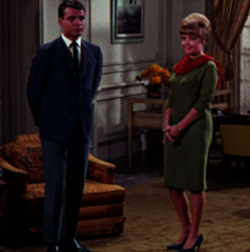

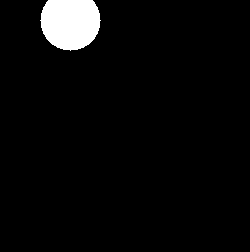

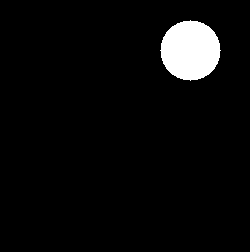

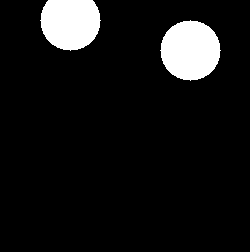

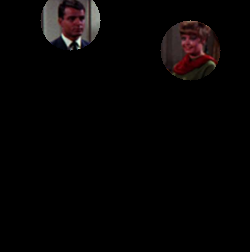

In [13]:
# Read an input image
img = cv.imread('/content/drive/MyDrive/PCVK/orang.png')

# Create two black masks with the same dimensions as the input image
mask1 = np.zeros(img.shape[:2], dtype=np.uint8)
mask2 = np.zeros(img.shape[:2], dtype=np.uint8)

# Define the center and radius of the first circular mask
center1 = (70, 20)  # Koordinat pusat bundar pertama
radius1 = 30  # Radius bundar pertama

# Define the center and radius of the second circular mask
center2 = (190, 50)  # Koordinat pusat bundar kedua
radius2 = 30  # Radius bundar kedua

# Draw filled white circles on the masks
cv.circle(mask1, center1, radius1, (255, 255, 255), thickness=-1)
cv.circle(mask2, center2, radius2, (255, 255, 255), thickness=-1)

# Perform bitwise OR operation to combine the masks
combined_mask = cv.bitwise_or(mask1, mask2)

# Perform bitwise AND operation to mask the image
masked_img = cv.bitwise_and(img, img, mask=combined_mask)

# Display the original image, masks, and the masked image
cv2_imshow(img)
cv2_imshow(mask1)
cv2_imshow(mask2)
cv2_imshow(combined_mask)
cv2_imshow(masked_img)

cv.waitKey(0)
cv.destroyAllWindows()

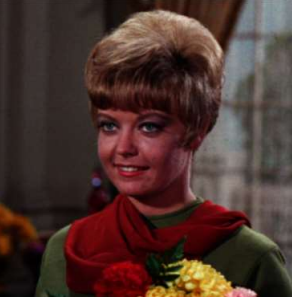

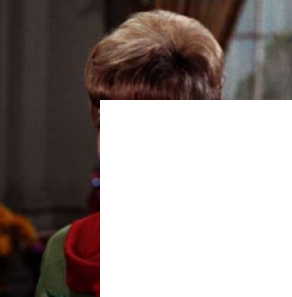

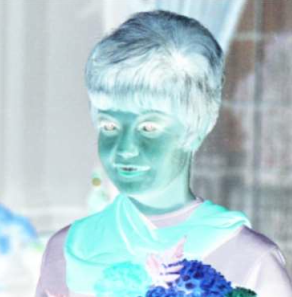

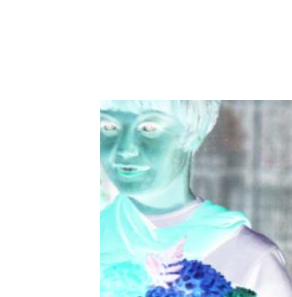

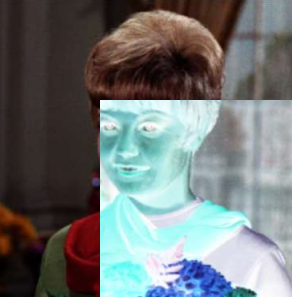

In [14]:
# Baca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/female.png')  # Konversi gambar menjadi grayscale

# Buat maska dengan format yang sama seperti gambar
mask = np.zeros_like(img)

# Tentukan area yang ingin dimask (misalnya, kotak)
x1, y1, x2, y2 = 100, 100, 300, 300

# Isi area kotak pada maska dengan nilai 255 (putih)
mask[y1:y2, x1:x2] = 255

# Lakukan operasi bitwise OR antara gambar dan maska
or_result = cv.bitwise_or(img, mask)

# Lakukan operasi bitwise NOT pada gambar
not_result = cv.bitwise_not(img)

# Lakukan operasi bitwise NAND antara gambar dan maska
nand_result = cv.bitwise_not(cv.bitwise_and(img, mask))

# Lakukan operasi bitwise XOR antara gambar dan maska
xor_result = cv.bitwise_xor(img, mask)

# Tampilkan gambar asli dan hasil operasi logika
cv2_imshow(img)
cv2_imshow(or_result)
cv2_imshow(not_result)
cv2_imshow(nand_result)
cv2_imshow(xor_result)

# Tunggu sampai pengguna menekan tombol apapun
cv.waitKey(0)
cv.destroyAllWindows()